In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
os.chdir('/home/ubuntu/Masters_Thesis')

from scripts.utilities.visualisation import *

from matplotlib import font_manager
font_dirs = ['/home/ubuntu/Masters_Thesis/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

In [2]:
data_unprocessed_with_bots = pd.read_csv("/mnt/dataset1/raw_data/Bitcoin_twitter_data_english_non_textprocessed.csv", lineterminator='\n')
data_unprocessed_with_bots.drop(columns=["Unnamed: 0", "user_location", "user_description"], inplace=True)

data_unprocessed_wo_bots = pd.read_csv("/mnt/dataset1/raw_data/Bitcoin_twitter_data_english_non_textprocessed_botremovedtweets.csv", lineterminator='\n')
data_unprocessed_wo_bots.drop(columns=["Unnamed: 0", "user_location", "user_description"], inplace=True)

In [3]:
data_unprocessed_wo_bots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592500 entries, 0 to 3592499
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0.1     int64  
 1   user_name        object 
 2   user_created     object 
 3   user_followers   float64
 4   user_friends     float64
 5   user_favourites  float64
 6   user_verified    bool   
 7   date             object 
 8   text             object 
 9   hashtags         object 
 10  source           object 
 11  is_retweet       object 
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 304.9+ MB


In [10]:
def make_prob_distribution_plot(data, bot_removed = False):
    user_data = data.groupby(['user_name']).max()
    followers_counts = user_data["user_followers"].value_counts()
    followers_counts = followers_counts.sort_index()
    total_users = len(user_data)  # Total number of users

    # Calculate probability distribution by dividing counts by total number of users
    probability_distribution = followers_counts / total_users

    plt.bar(followers_counts.index, probability_distribution)
    plt.xscale('log')
    plt.xlabel('Number of Followers')
    plt.ylabel('Probability')
    if bot_removed:
        plt.title('Probability Distribution of Number of Followers after removing bot tweets')
    else:
        plt.title('Probability Distribution of Number of Followers before removing bot tweets')
    plt.show()
    
def make_prob_density_plot(data, bot_removed=False):
    user_data = data.groupby(['user_name']).max()
    followers_counts = user_data["user_followers"].value_counts()
    followers_counts = followers_counts.sort_index()
    total_users = len(user_data)  # Total number of users

    # Calculate bin width
    bins = followers_counts.index
    bin_width = np.diff(bins)
    bin_width = np.append(bin_width, bin_width[-1]) 

    # Calculate probability density by dividing counts by total number of users and bin width
    probability_density = followers_counts / (total_users * bin_width)

    plt.bar(followers_counts.index, probability_density, width=bin_width)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Number of Followers')
    plt.ylabel('Probability Density')
    if bot_removed:
        plt.title('Probability Density of Number of Followers after removing bot tweets')
    else:
        plt.title('Probability Density of Number of Followers before removing bot tweets')
    plt.show()
    
def make_prob_density_plot_scatter(data, metric, bot_removed=False):
    user_data = data.groupby(['user_name']).max()
    followers_counts = user_data[metric].value_counts()
    followers_counts = followers_counts.sort_index()
    total_users = len(user_data)  # Total number of users

    # Calculate bin width
    bins = followers_counts.index
    bin_width = np.diff(bins)
    bin_width = np.append(bin_width, bin_width[-1]) 

    # Calculate probability density by dividing counts by total number of users and bin width
    probability_density = followers_counts / (total_users * bin_width)

    # Plot probability density as single points
    plt.scatter(followers_counts.index, probability_density, color='blue', label='Probability Density', s=3)

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(f'{metric}', fontsize=10)
    plt.ylabel('Probability Density', fontsize=10)
    if bot_removed:
        plt.title(f'Probability Density of {metric} after removing bot tweets')
    else:
        plt.title(f'Probability Density of {metric} before removing bot tweets')
    plt.legend()
    plt.show()
    
def make_prob_density_plot_scatterlessbins(data, metric, bot_removed=False, num_bins=500):
    user_data = data.groupby(['user_name']).max()
    followers_counts = user_data[metric].value_counts()
    followers_counts = followers_counts.sort_index()
    total_users = len(user_data)  # Total number of users

    # Calculate bin edges using logarithmic binning
    # min_value = np.log10(followers_counts.index.min())
    min_value = 1e-1
    max_value = np.log10(followers_counts.index.max())
    bins = np.logspace(min_value, max_value, num_bins+1)

    # Calculate the center of each bin
    bin_centers = np.sqrt(bins[:-1] * bins[1:])

    # Calculate the probability density for each bin
    bin_counts, _ = np.histogram(followers_counts.index, bins=bins)
    probability_density = bin_counts / (total_users * np.diff(bins))

    # Plot probability density as single points for each bin
    plt.scatter(bin_centers, probability_density, color='blue', label='Probability Density')

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(f'{metric}')
    plt.ylabel('Probability Density')
    if bot_removed:
        plt.title('Probability Density of Number of Followers after removing bot tweets')
    else:
        plt.title('Probability Density of Number of Followers before removing bot tweets')
    plt.legend()
    plt.show()

In [11]:
user_data_unp_with_bots = data_unprocessed_with_bots[['user_name', 'user_followers', 'user_friends', 'user_favourites', 'user_verified']]
user_data_unp_wo_bots = data_unprocessed_wo_bots[['user_name', 'user_followers', 'user_friends', 'user_favourites', 'user_verified']]
user_data_unp_with_bots['user_influence'] = ((user_data_unp_with_bots['user_followers']+1)/(np.log(user_data_unp_with_bots['user_friends']+1)+1))*(user_data_unp_with_bots['user_favourites']+1)*(user_data_unp_with_bots["user_verified"]+1)
user_data_unp_wo_bots['user_influence'] = ((user_data_unp_wo_bots['user_followers']+1)/(np.log(user_data_unp_wo_bots['user_friends']+1)+1))*(user_data_unp_wo_bots['user_favourites']+1)*(user_data_unp_wo_bots["user_verified"]+1)

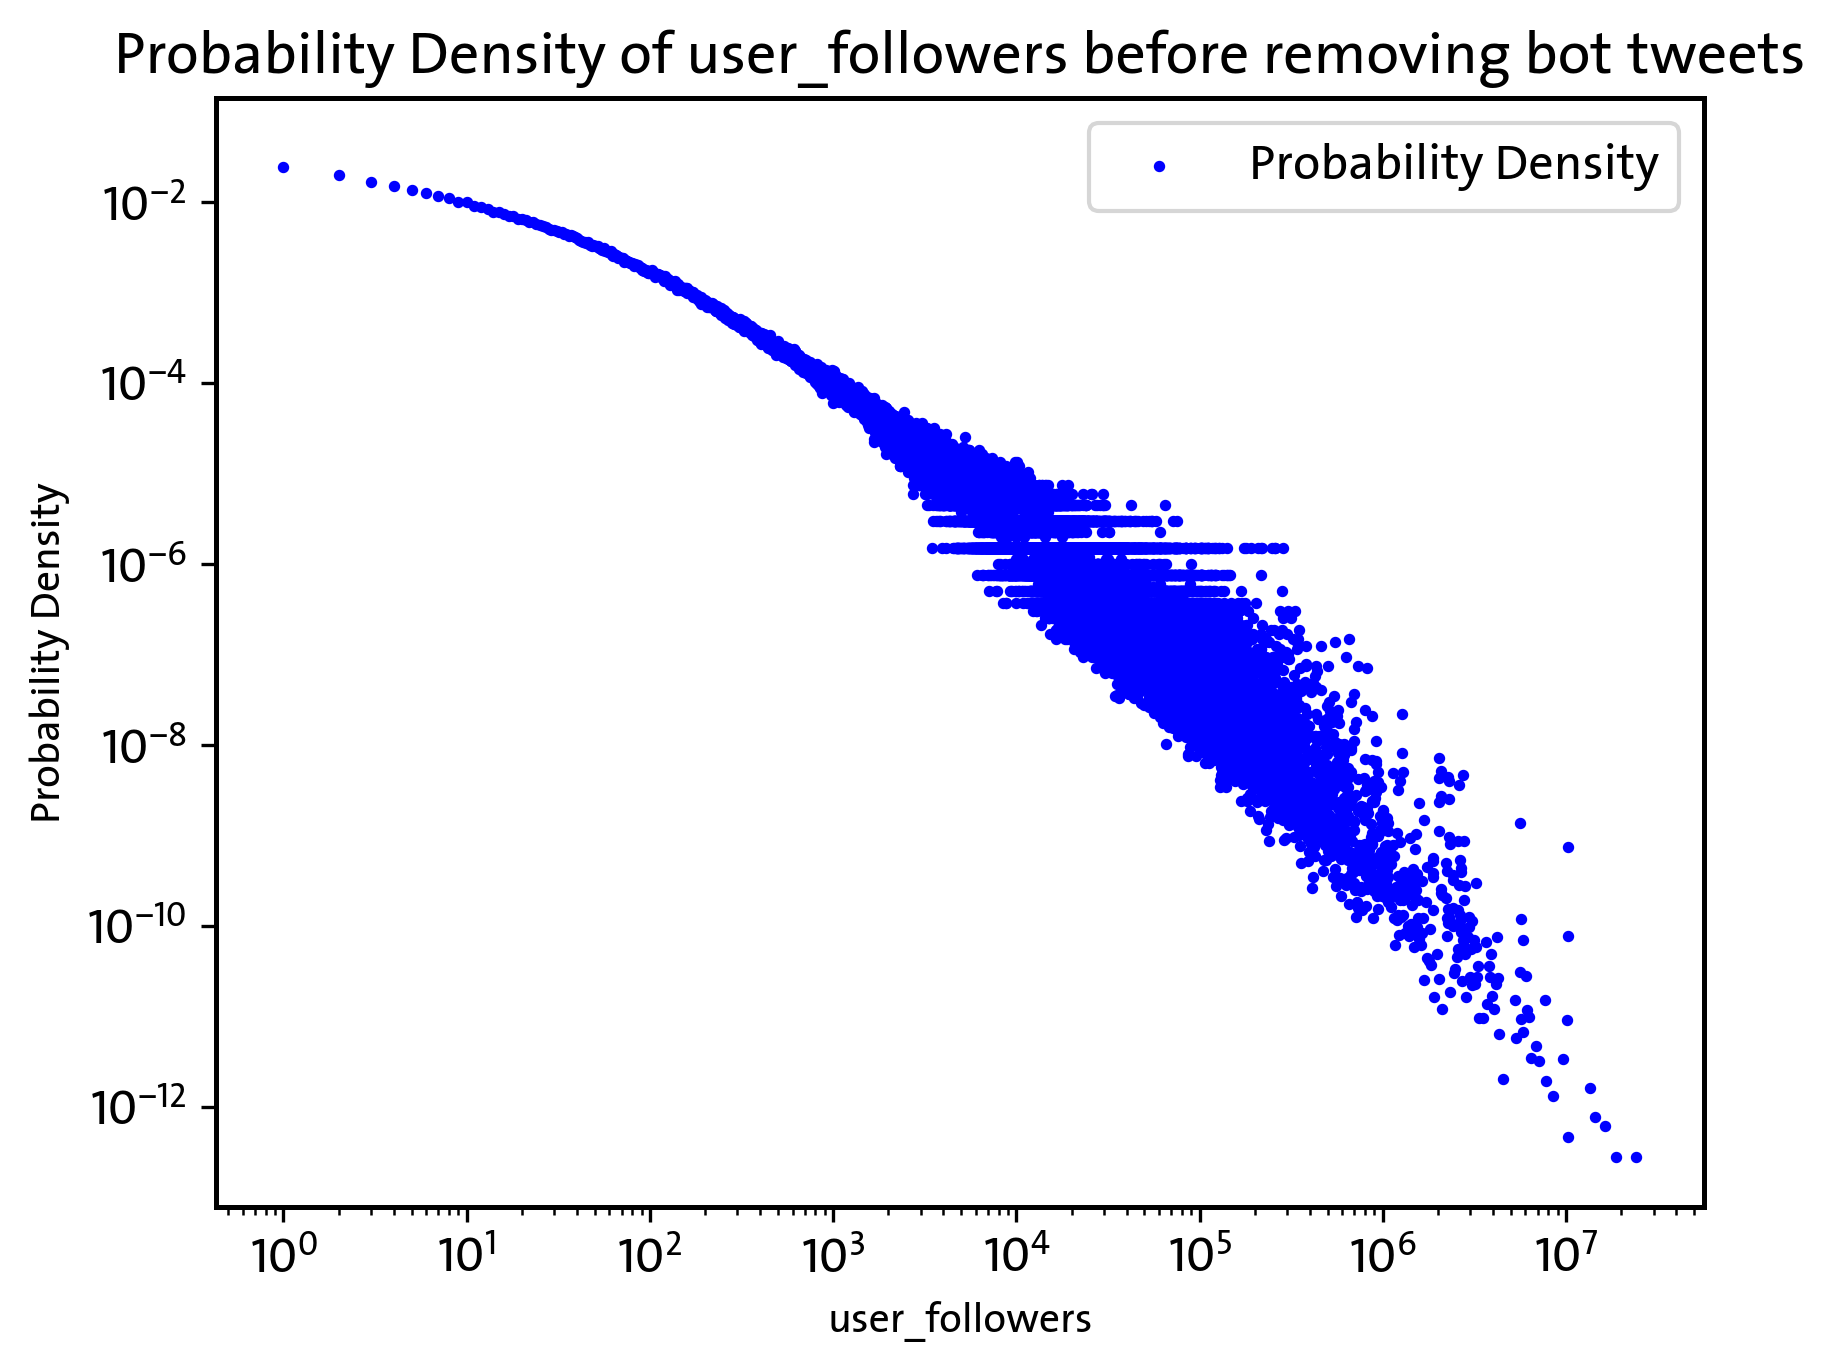

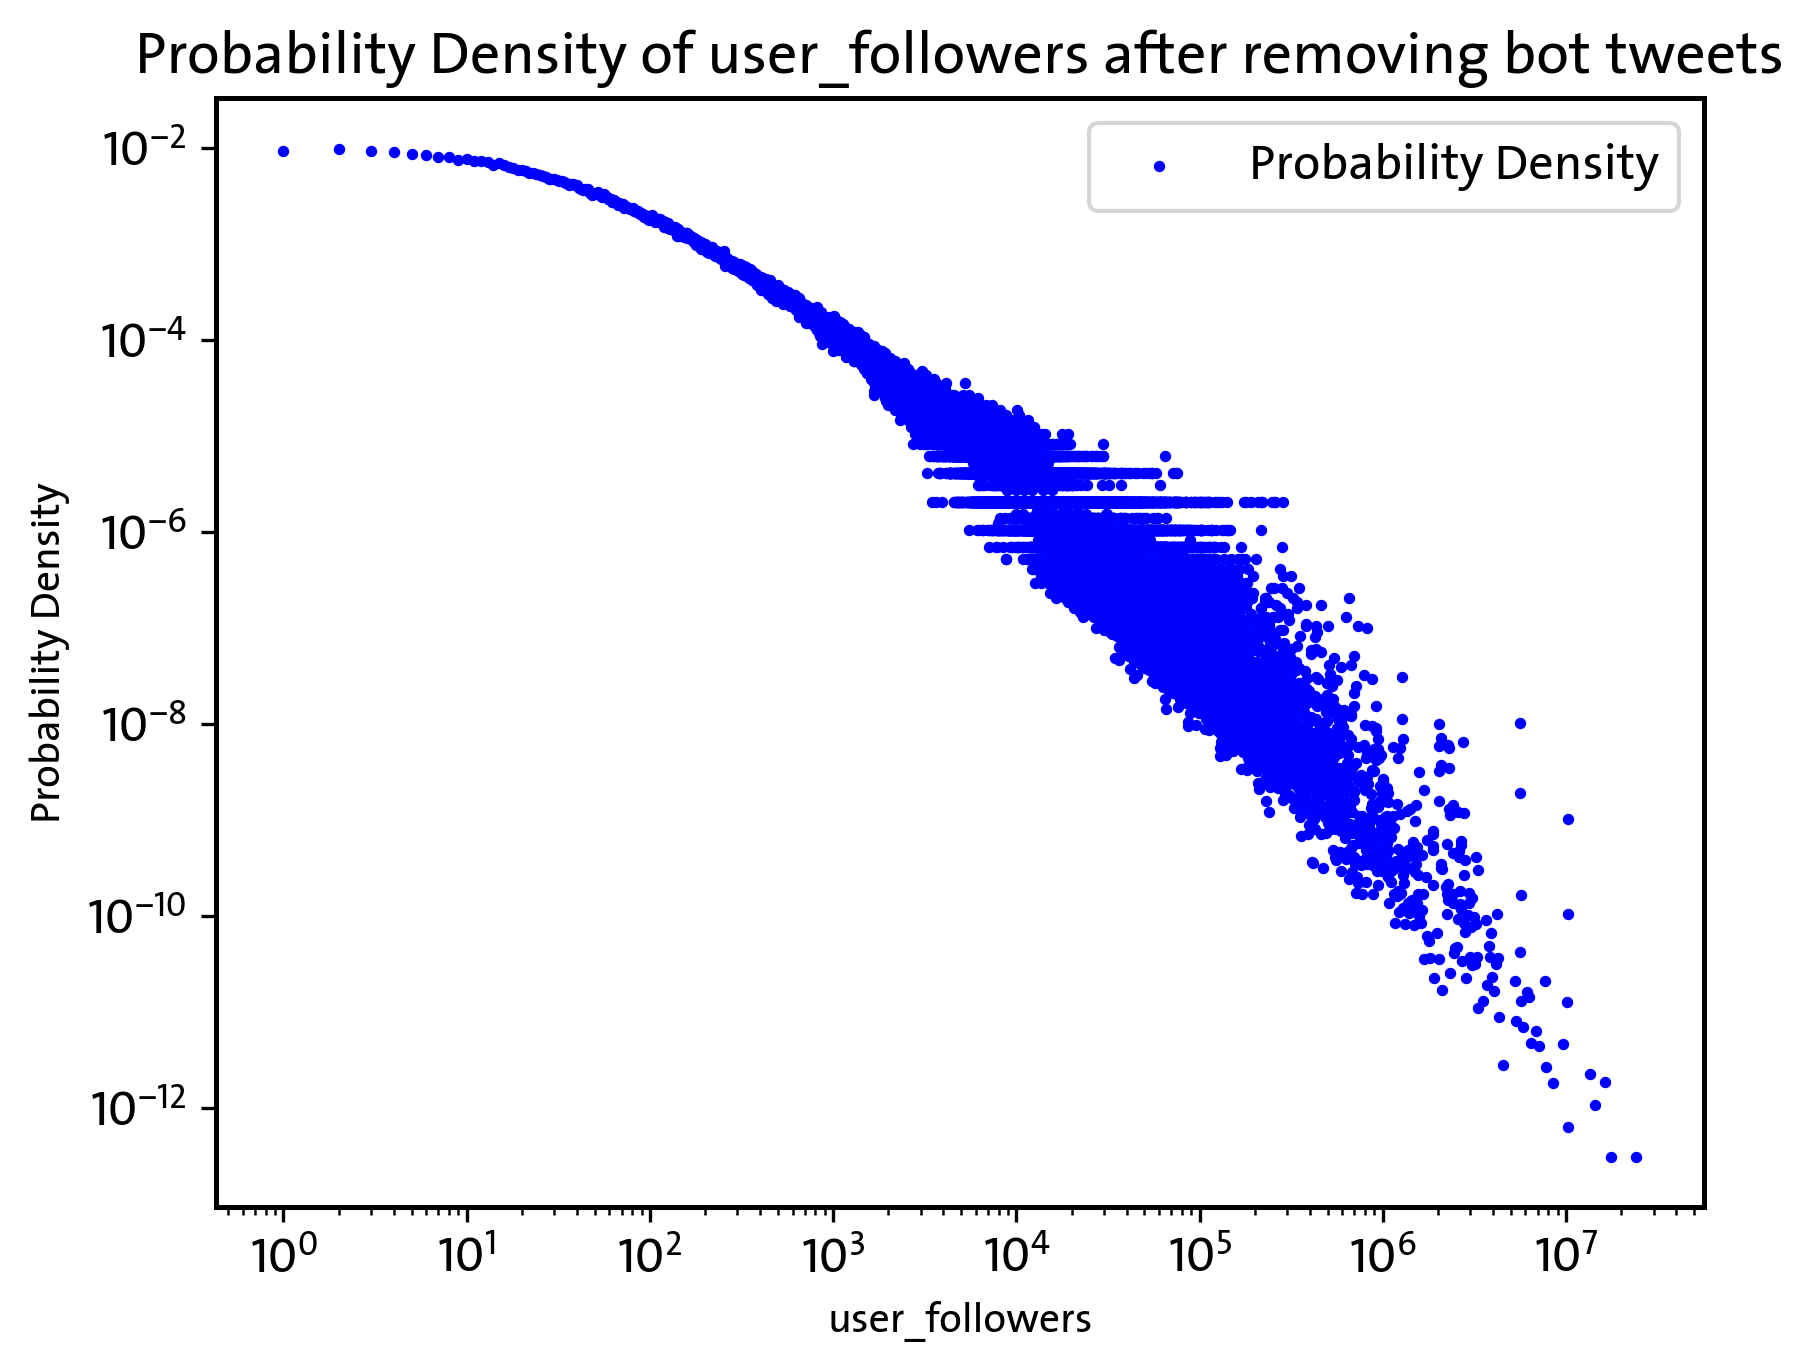

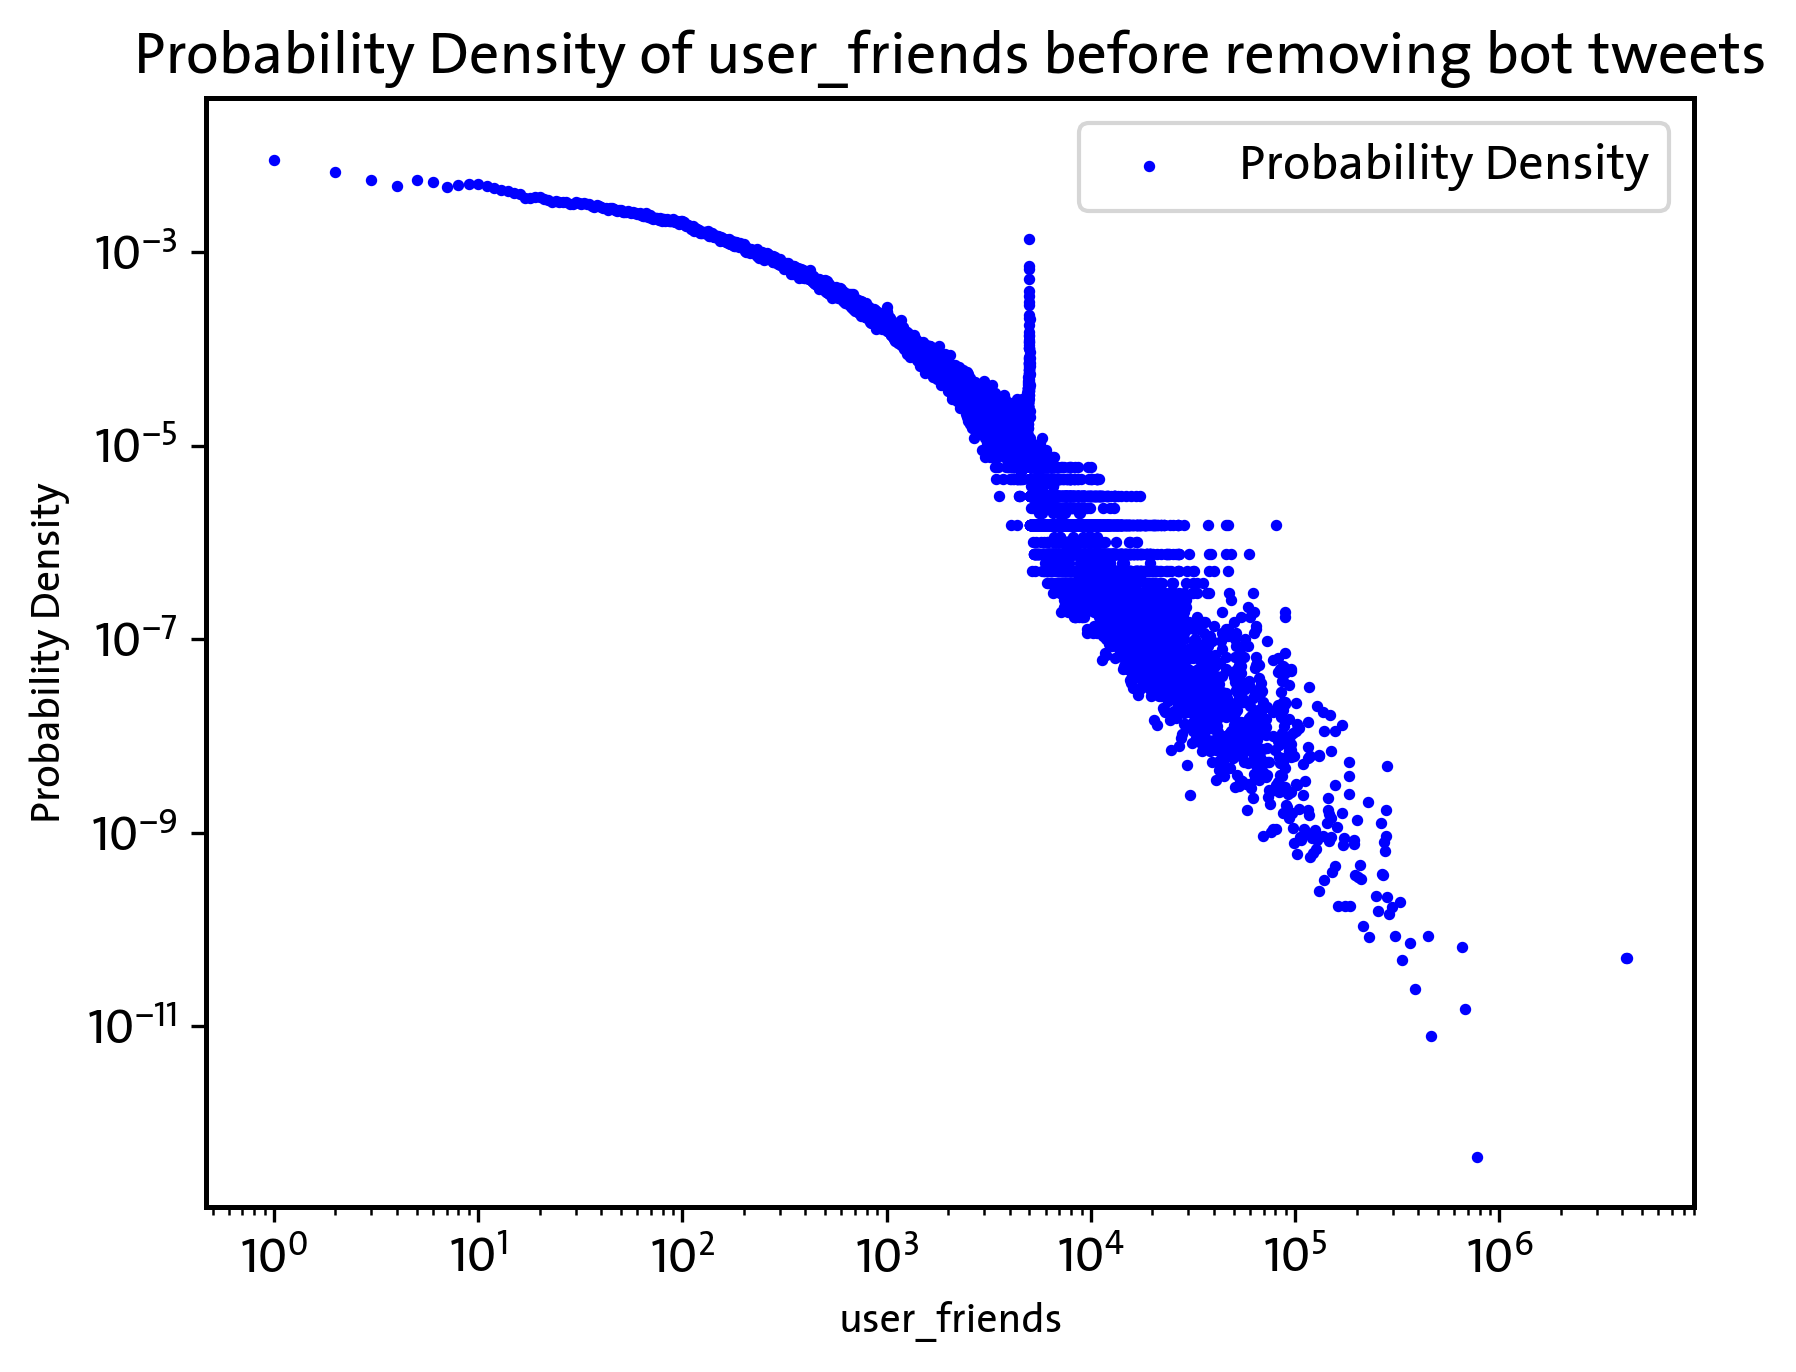

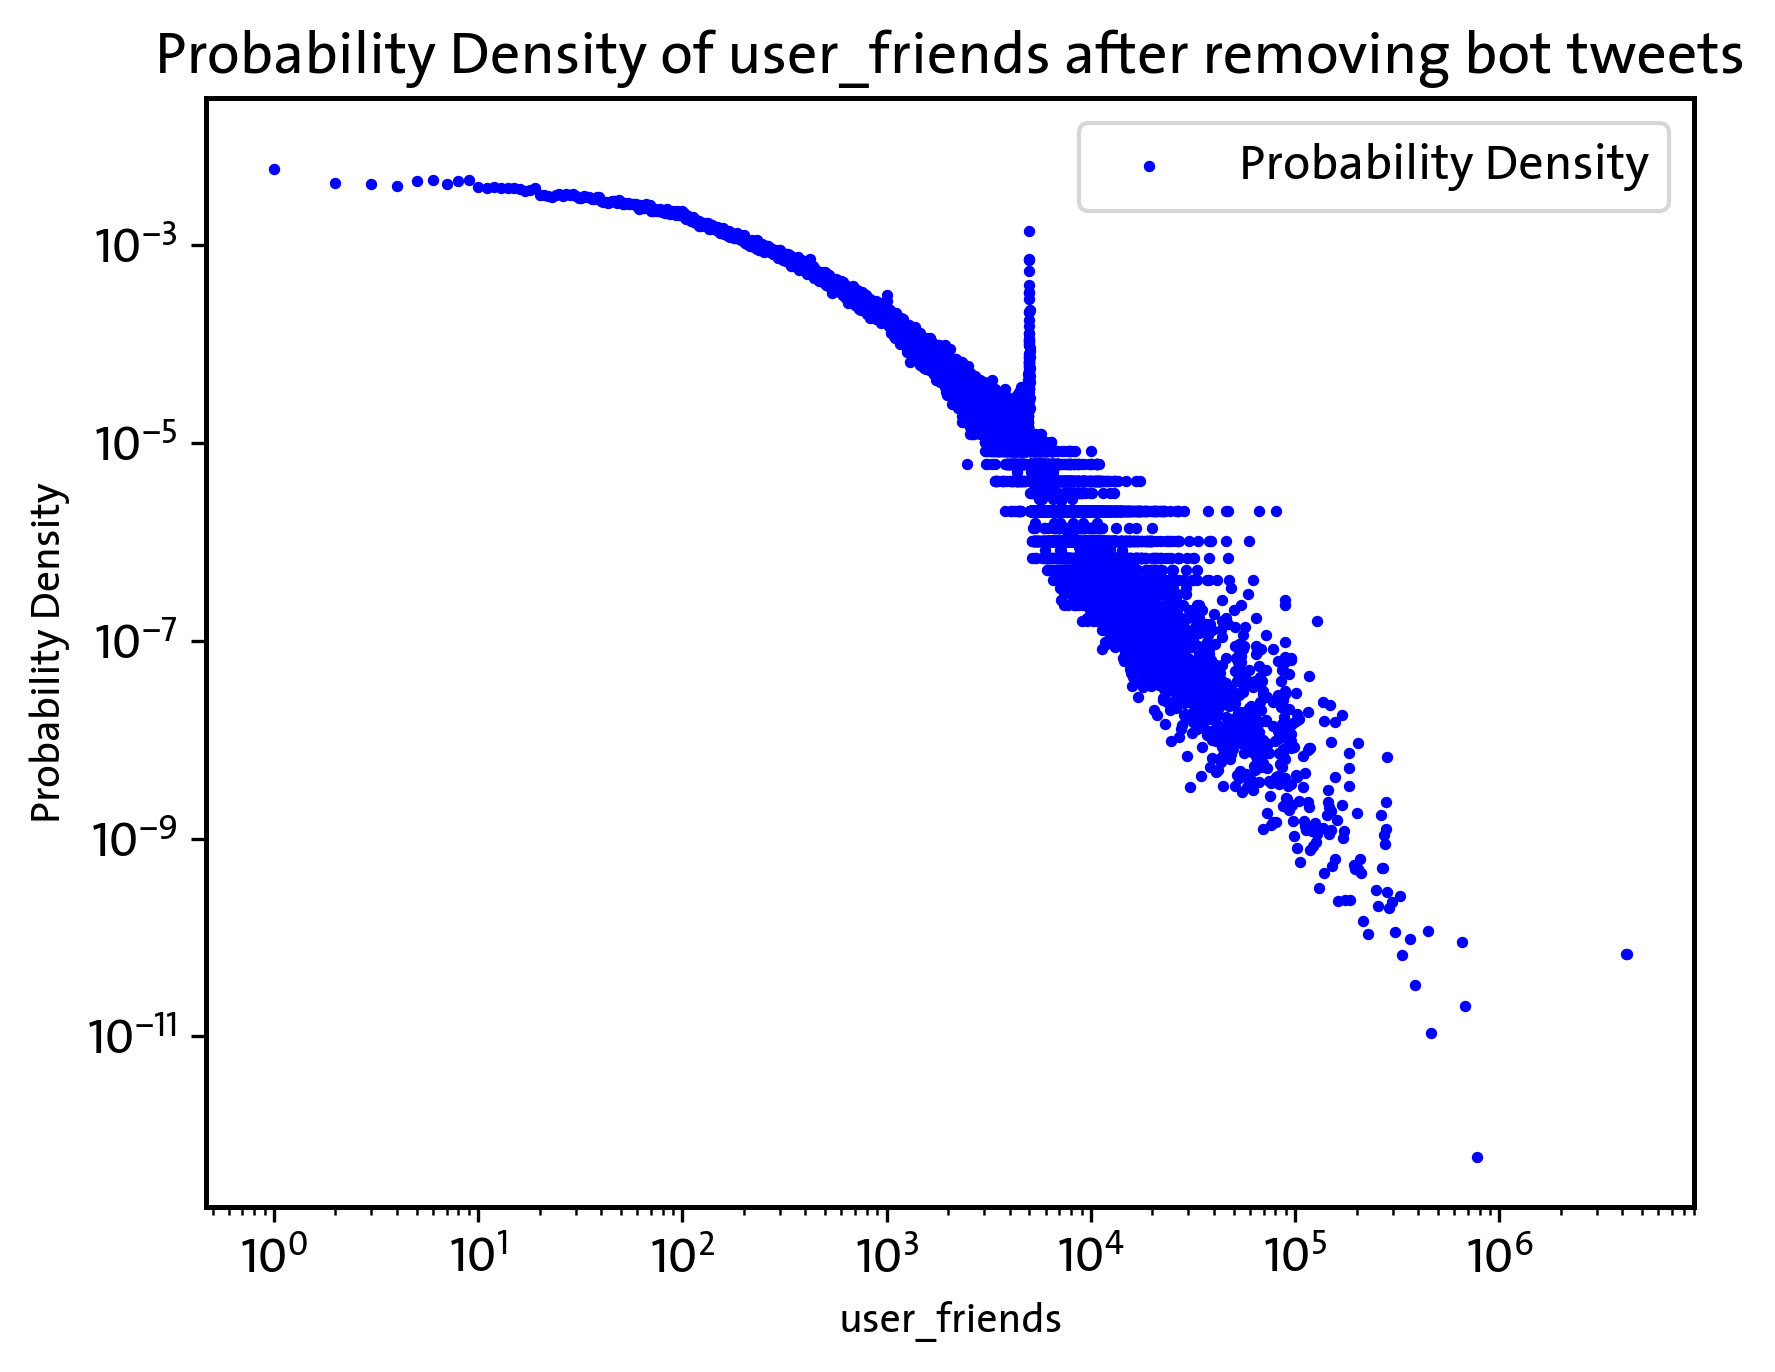

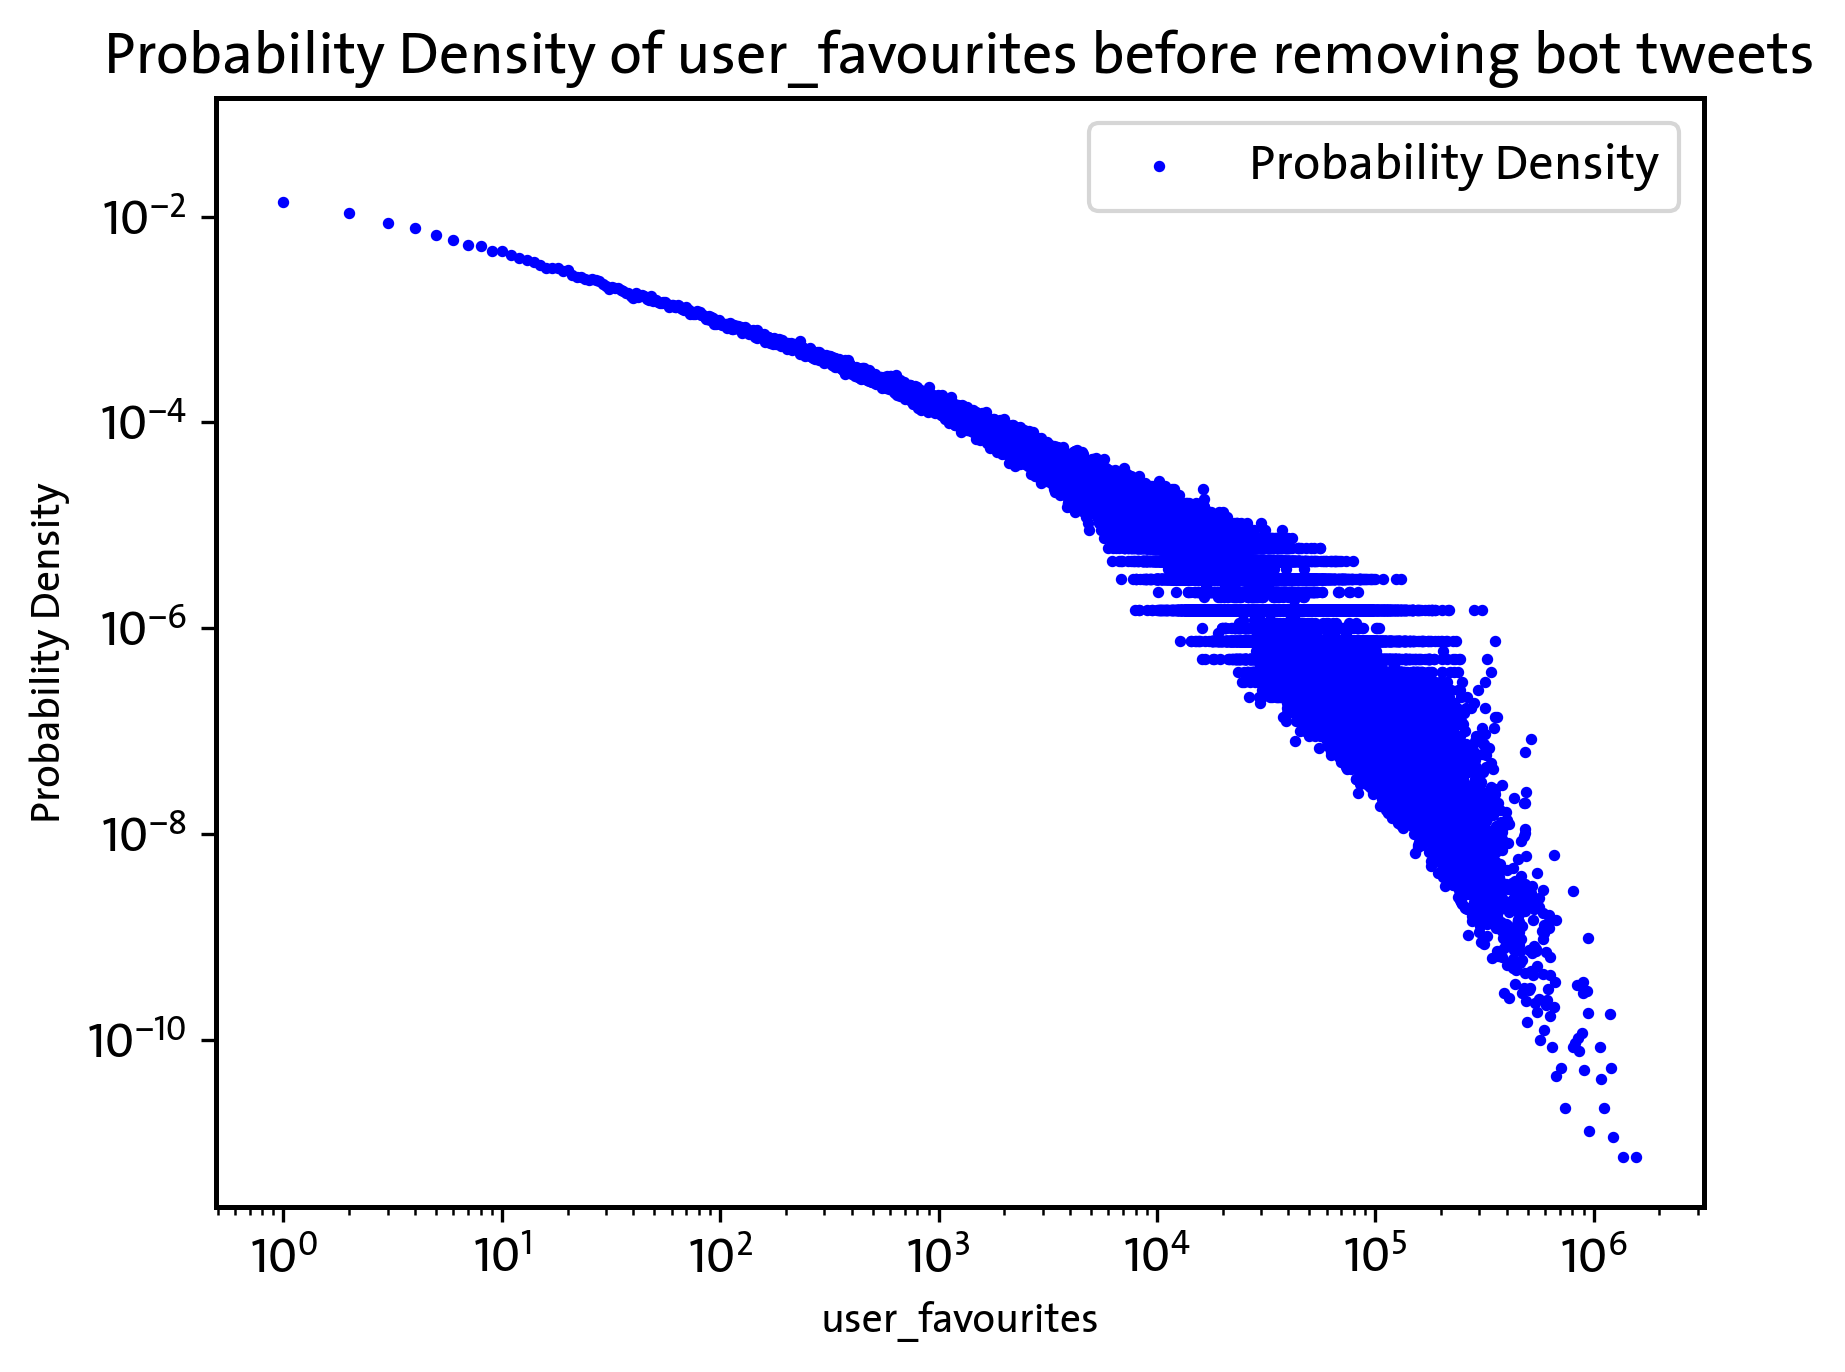

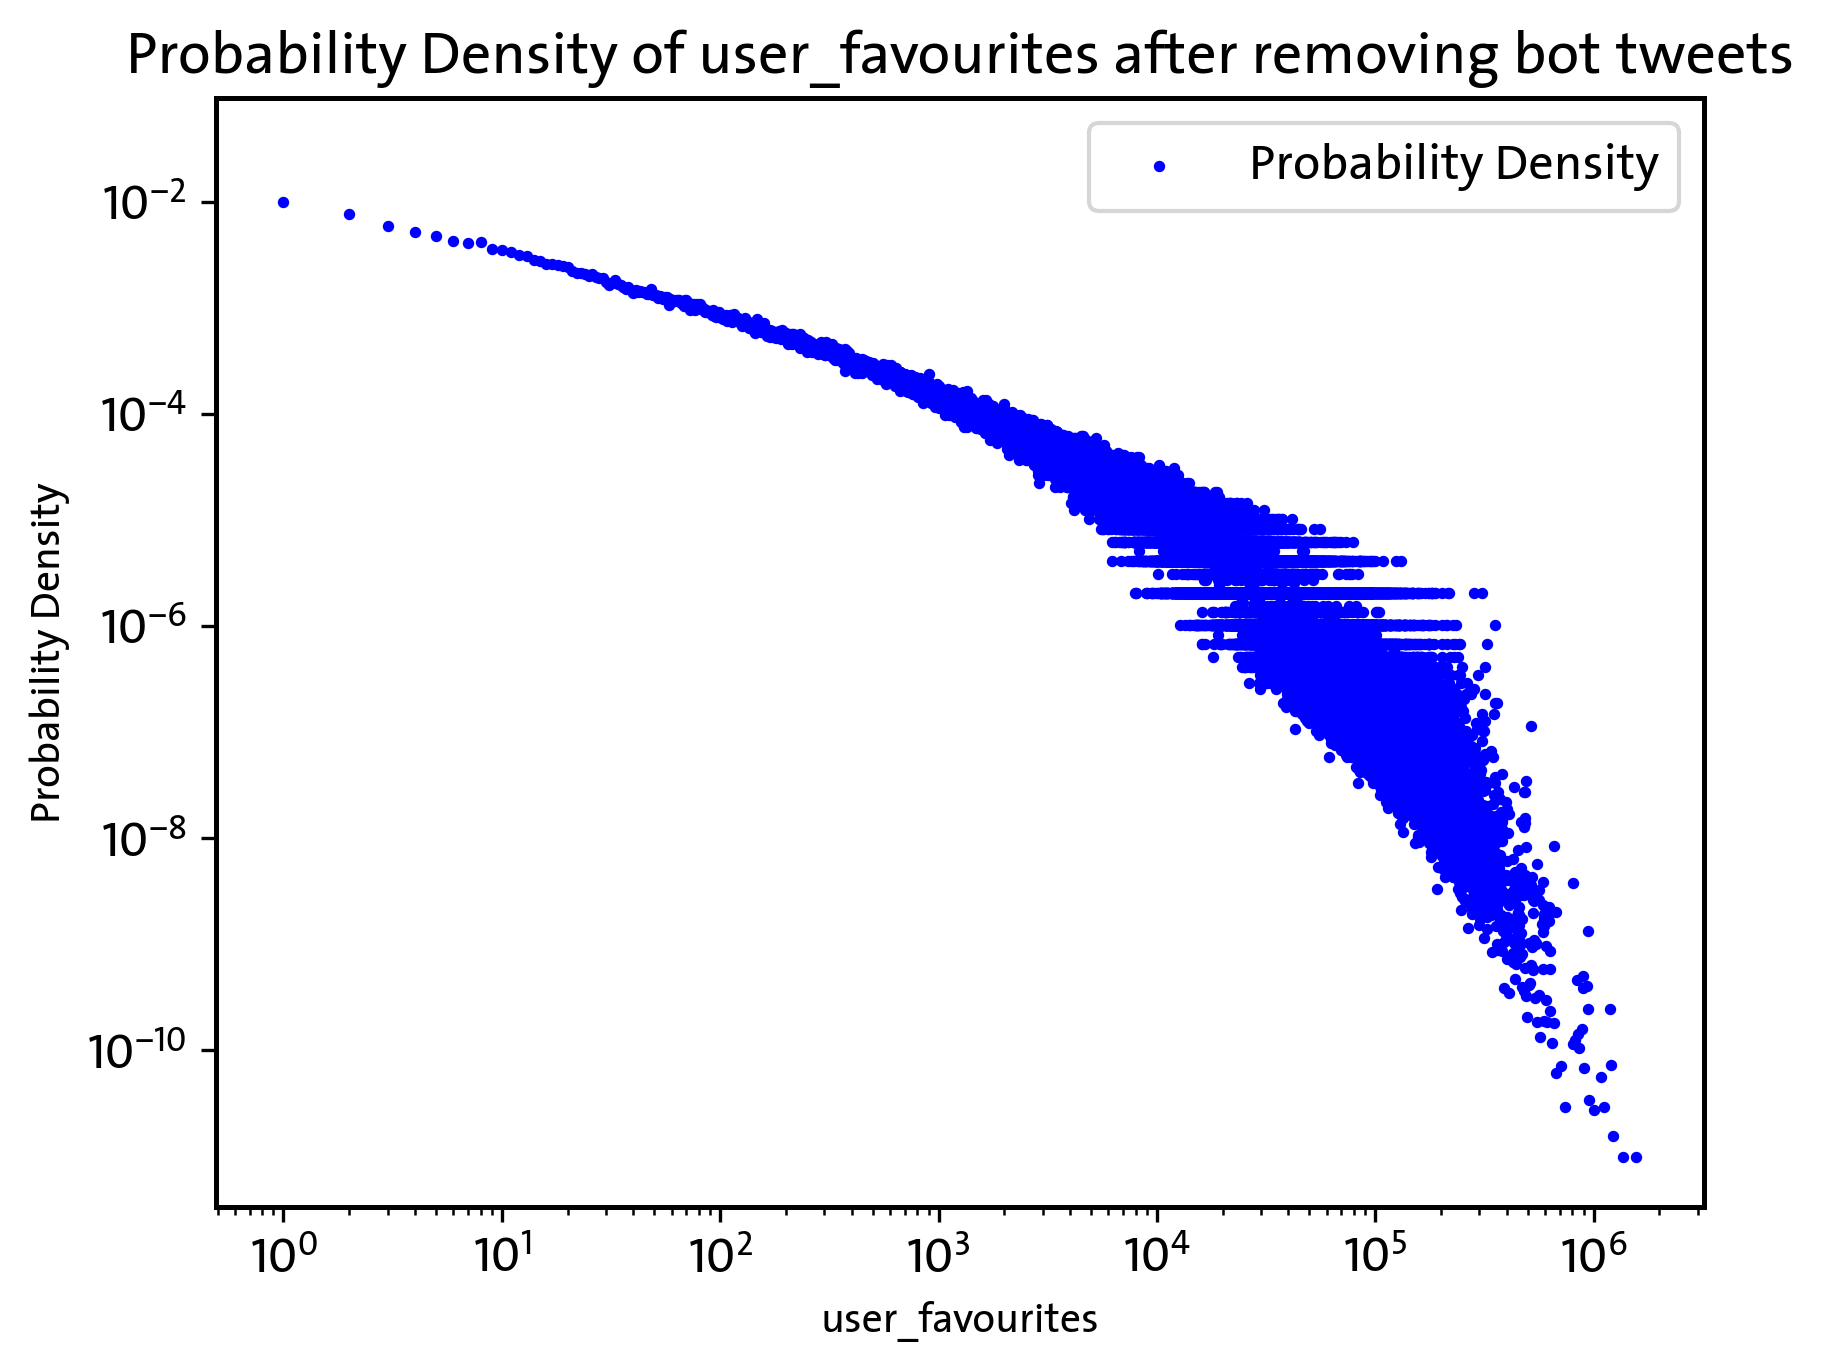

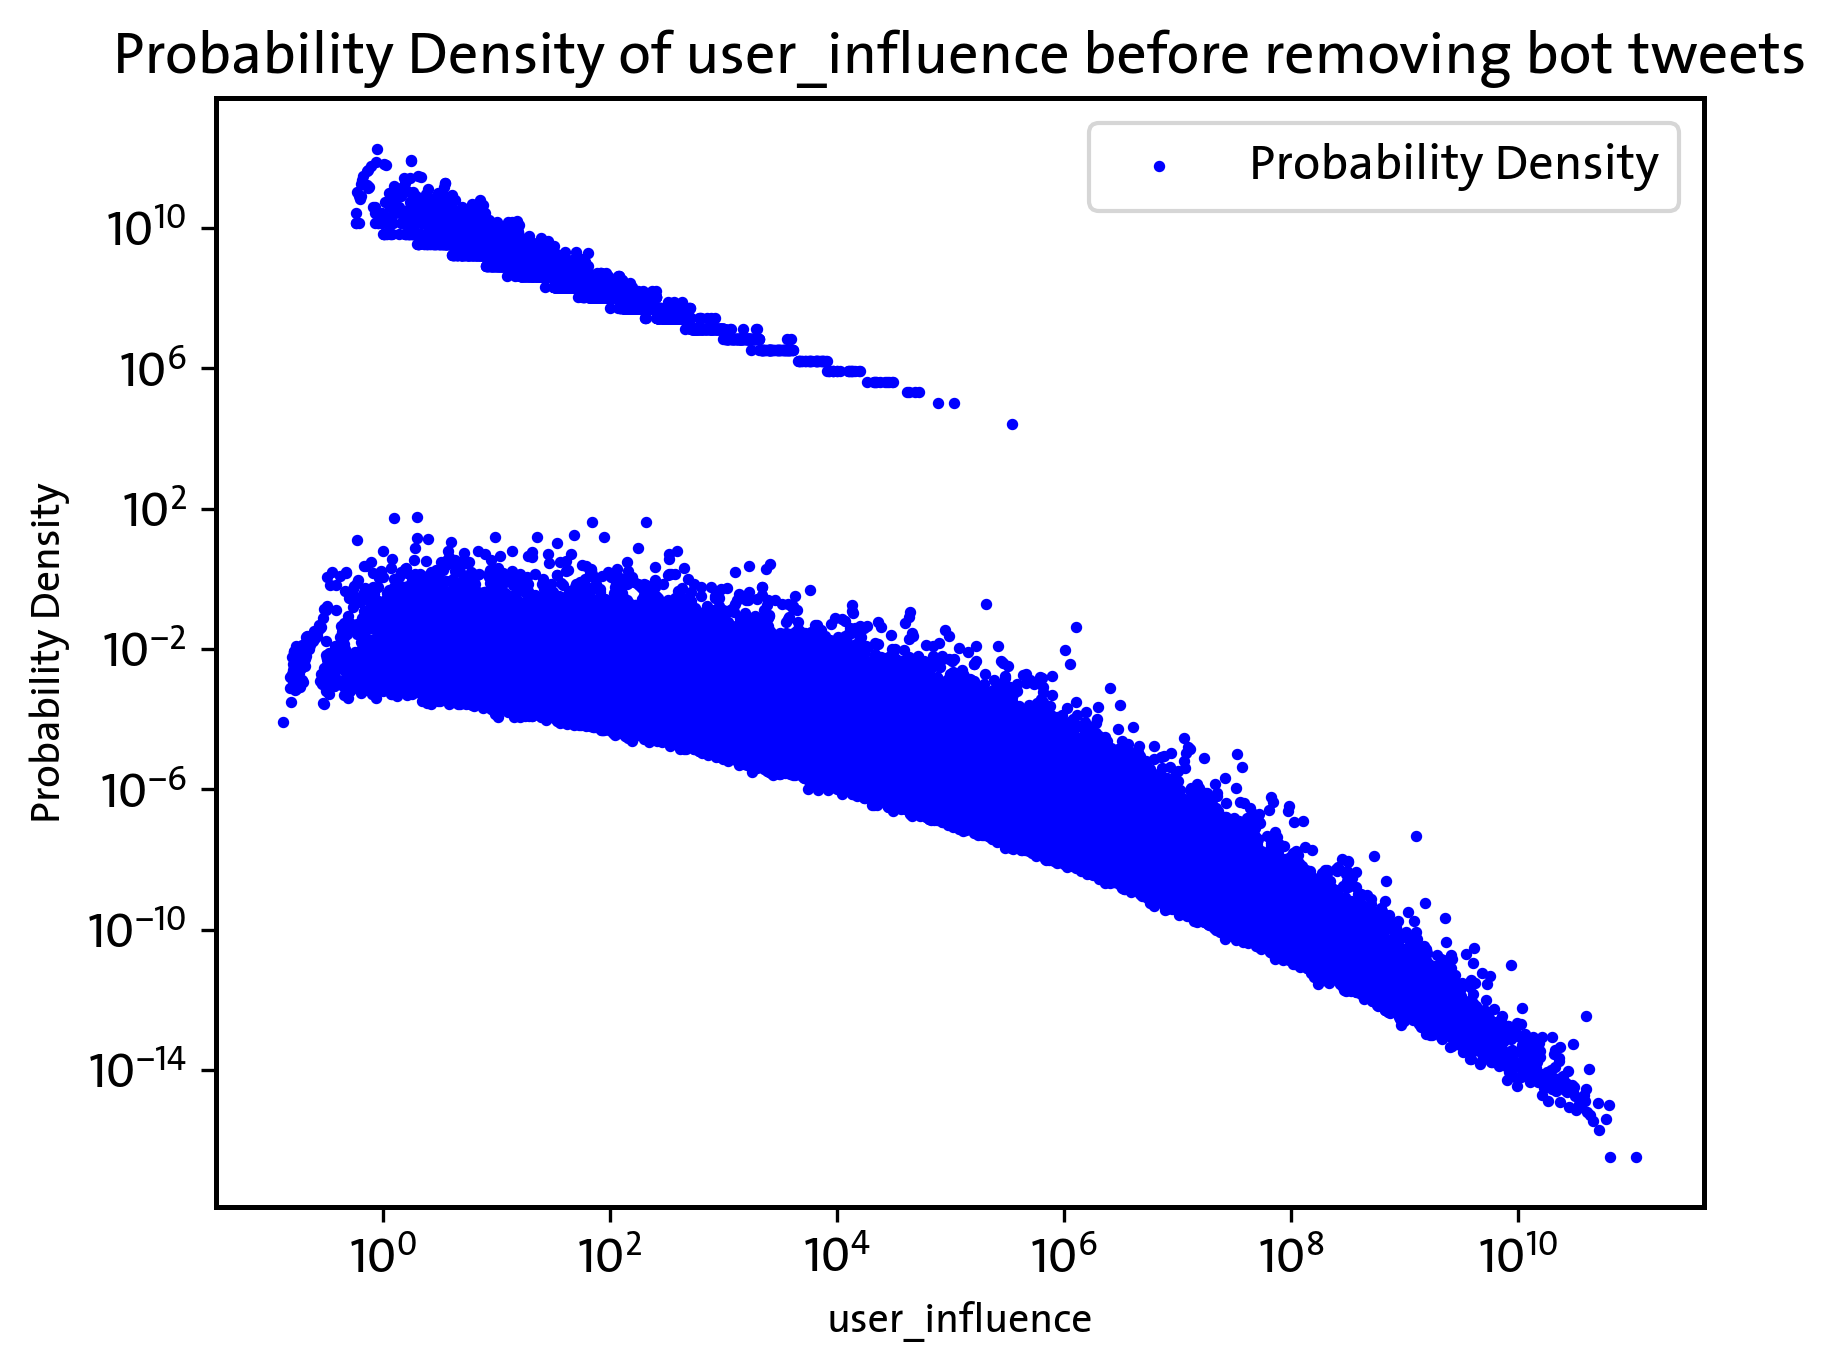

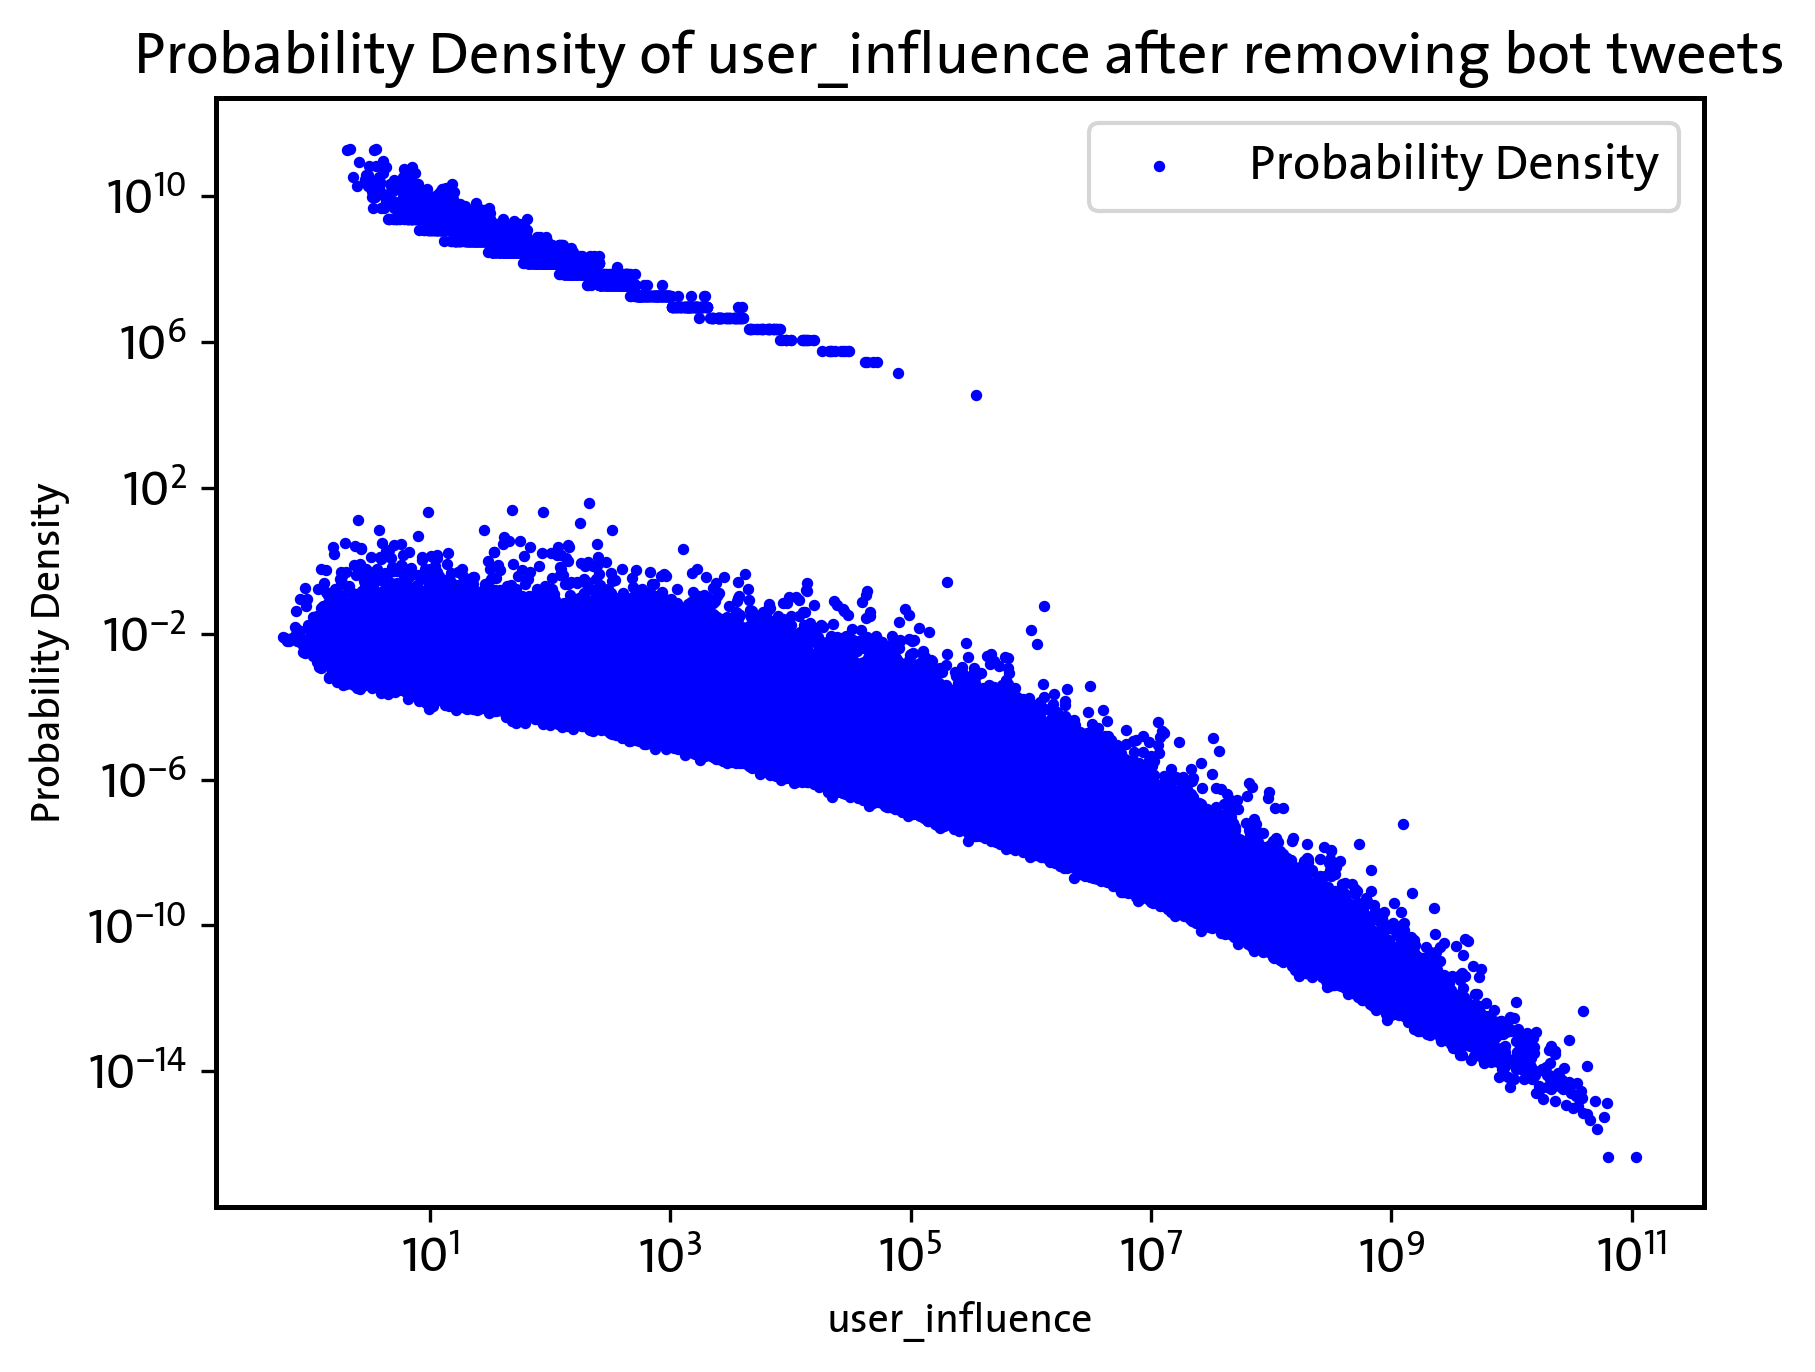

In [12]:

make_prob_density_plot_scatter(user_data_unp_with_bots, metric= 'user_followers', bot_removed=False)
make_prob_density_plot_scatter(user_data_unp_wo_bots, metric= 'user_followers', bot_removed=True)
make_prob_density_plot_scatter(user_data_unp_with_bots, metric= 'user_friends', bot_removed=False)
make_prob_density_plot_scatter(user_data_unp_wo_bots, metric= 'user_friends', bot_removed=True)
make_prob_density_plot_scatter(user_data_unp_with_bots, metric= 'user_favourites', bot_removed=False)
make_prob_density_plot_scatter(user_data_unp_wo_bots, metric= 'user_favourites', bot_removed=True)
make_prob_density_plot_scatter(user_data_unp_with_bots, metric= 'user_influence', bot_removed=False)
make_prob_density_plot_scatter(user_data_unp_wo_bots, metric= 'user_influence', bot_removed=True)

In [7]:
# user_data_unp_with_bots = data_unprocessed_with_bots[['user_name', 'user_followers', 'user_friends', 'user_favourites']]
# make_prob_density_plot_scatter(user_data_unp_with_bots, bot_removed=False)

In [8]:
# user_data_unp_with_bots = data_unprocessed_with_bots[['user_name', 'user_followers', 'user_friends', 'user_favourites']]
# make_prob_distribution_plot(user_data_unp_with_bots, bot_removed=False)

In [9]:
# make_prob_distribution_plot(data_unprocessed_wo_bots, bot_removed=True)